<a href="https://colab.research.google.com/github/kwasicode/machine_learning/blob/main/deep_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
import os
import zipfile

# Replace with the name of your zip file
zip_file = 'nicknochnack ImageClassification main data.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# Check the extracted contents
print(os.listdir())


['.config', 'happy', 'sad', 'dataset', '.ipynb_checkpoints', 'nicknochnack ImageClassification main data.zip', 'sample_data']


In [76]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [77]:
tf.config.list_physical_devices('GPU')

[]

In [78]:
import cv2
import imghdr

In [79]:
data_dir = 'dataset'

In [80]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [82]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [83]:
import numpy as np
from matplotlib import pyplot as plt

In [85]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 305 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()

In [87]:
batch = data_iterator.next()

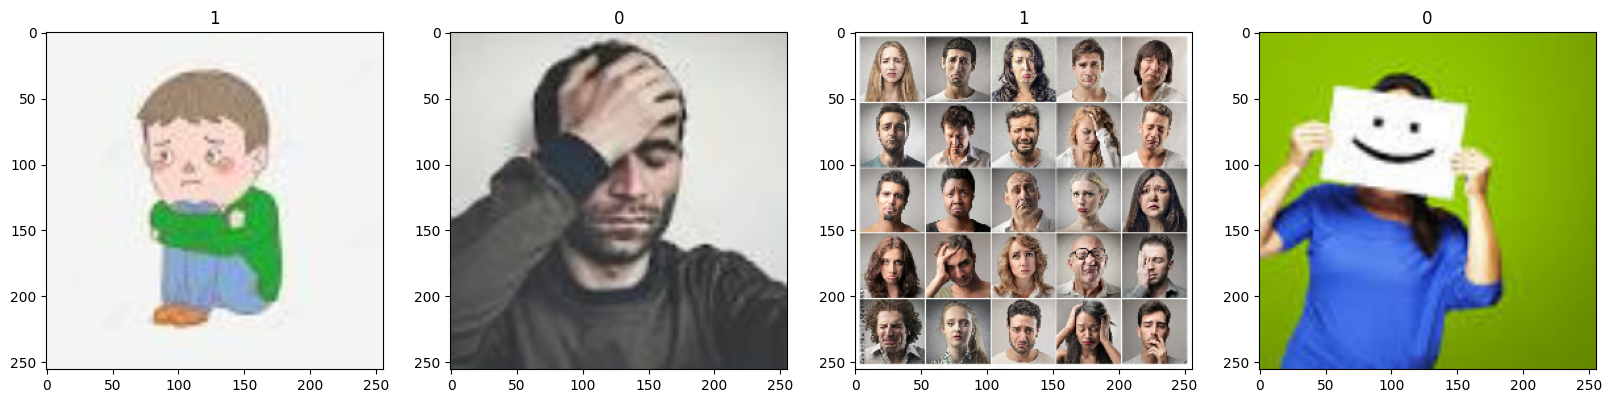

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [90]:
data = data.map(lambda x,y: (x/255, y))

In [91]:
data.as_numpy_iterator().next()

(array([[[[0.7607843 , 0.6156863 , 0.4117647 ],
          [0.7614277 , 0.61632967, 0.41240808],
          [0.7657782 , 0.62068015, 0.41675857],
          ...,
          [0.74509805, 0.6156863 , 0.44705883],
          [0.74509805, 0.6156863 , 0.44705883],
          [0.74509805, 0.6156863 , 0.44705883]],
 
         [[0.7608995 , 0.61580145, 0.4118799 ],
          [0.763534  , 0.618436  , 0.4145144 ],
          [0.7678845 , 0.62278646, 0.41886488],
          ...,
          [0.74720436, 0.6177926 , 0.44916514],
          [0.74720436, 0.6177926 , 0.44916514],
          [0.74720436, 0.6177926 , 0.44916514]],
 
         [[0.76189494, 0.61679685, 0.4128753 ],
          [0.7662454 , 0.6211474 , 0.4172258 ],
          [0.7705959 , 0.6254979 , 0.4215763 ],
          ...,
          [0.7490196 , 0.61960787, 0.4509804 ],
          [0.7490196 , 0.61960787, 0.4509804 ],
          [0.7490196 , 0.61960787, 0.4509804 ]],
 
         ...,
 
         [[0.29528037, 0.15533094, 0.05141243],
          [0.34773

In [92]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [93]:
train_size

7

In [94]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [95]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [97]:
model = Sequential()

In [98]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [101]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 1.3441 - accuracy: 0.5089 - val_loss: 0.8302 - val_accuracy: 0.4219
Epoch 2/20
7/7 [==============================] - 21s 2s/step - loss: 0.7143 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.4688
Epoch 3/20
7/7 [==============================] - 20s 3s/step - loss: 0.6947 - accuracy: 0.5089 - val_loss: 0.6583 - val_accuracy: 0.7031
Epoch 4/20
7/7 [==============================] - 21s 2s/step - loss: 0.6556 - accuracy: 0.6205 - val_loss: 0.5741 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 26s 3s/step - loss: 0.6003 - accuracy: 0.6875 - val_loss: 0.5804 - val_accuracy: 0.6562
Epoch 6/20
7/7 [==============================] - 21s 3s/step - loss: 0.4988 - accuracy: 0.7902 - val_loss: 0.4623 - val_accuracy: 0.7656
Epoch 7/20
7/7 [==============================] - 22s 3s/step - loss: 0.4388 - accuracy: 0.8080 - val_loss: 0.5491 - val_accuracy: 0.7188
Epoch 8/20
7/7 [==================

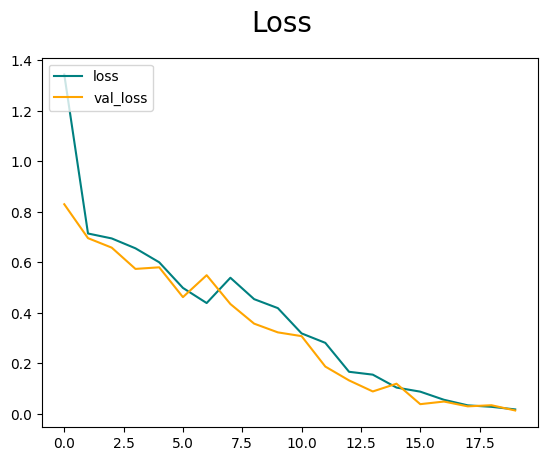

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

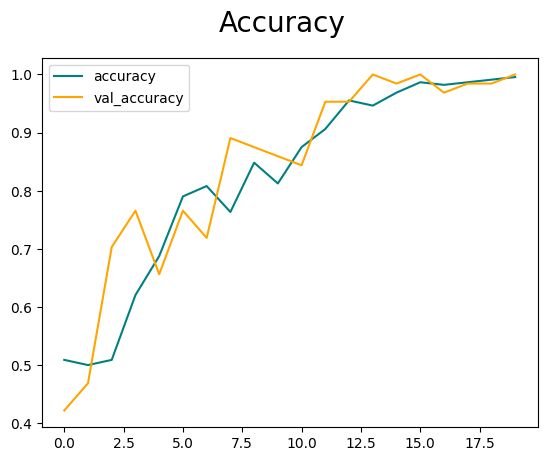

In [103]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [104]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 372ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9230769, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


10. Test model

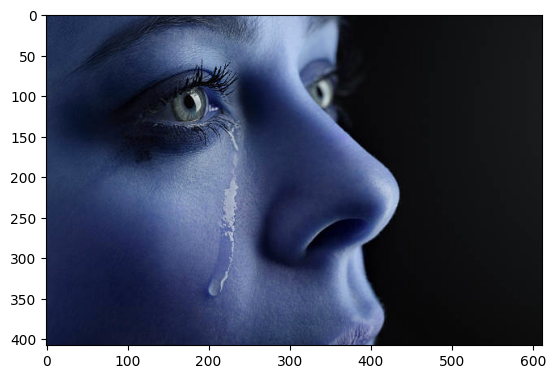

In [106]:
import cv2
img = cv2.imread('/content/saaad.jpg')
plt.imshow(img)
plt.show()

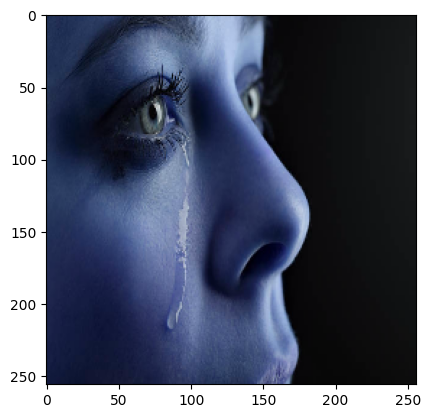

In [110]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()






In [111]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 95ms/step


array([[0.9999938]], dtype=float32)

In [118]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


save model

In [117]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifierr.h5'))

In [120]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/your_model_directory/imageclassifierr.h5')


Mounted at /content/drive


In [122]:
new_model = load_model('/content/drive/My Drive/your_model_directory/imageclassifierr.h5')

In [123]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 254ms/step


array([[0.9999938]], dtype=float32)